In [129]:
#Importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
import folium
from folium.plugins import HeatMap

In [3]:
#Lectura de base
airports = pd.read_csv('/Users/rodolfopardo/Downloads/list-of-airports-in-argentina-hxl-tags-1.csv')

In [4]:
#Primeros valores
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +code +iso2,#adm1 +code +iso,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,5781,SAEZ,large_airport,Ministro Pistarini International Airport,-34.8222,-58.5358,67,SA,AR,AR-B,Buenos Aires,1,SAEZ,EZE,EZE,http://www.aa2000.com.ar/index.php,http://en.wikipedia.org/wiki/Ministro_Pistarin...,BUE,1275,2014-03-22T11:40:17+00:00
2,5771,SABE,medium_airport,Jorge Newbery Airpark,-34.5592,-58.4156,18,SA,AR,AR-C,Buenos Aires,1,SABE,AEP,AER,NaN,http://en.wikipedia.org/wiki/Aeroparque_Jorge_...,NaN,1050,2011-12-03T02:52:13+00:00
3,5806,SARI,medium_airport,Cataratas Del Iguazú International Airport,-25.737301,-54.4734,916,SA,AR,AR-N,Puerto Iguazu,1,SARI,IGR,IGU,http://www.aa2000.com.ar/iguazu,https://en.wikipedia.org/wiki/Cataratas_del_Ig...,Iguaçu,1050,2018-09-13T12:34:47+00:00
4,5835,SAWH,medium_airport,Malvinas Argentinas Airport,-54.8433,-68.2958,102,SA,AR,AR-V,Ushuahia,1,SAWH,USH,USU,NaN,http://en.wikipedia.org/wiki/Ushuaia_Internati...,NaN,1050,2011-02-13T13:26:18+00:00


In [5]:
airports.tail()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
844,318506,AR-0568,small_airport,RAIG S.A. Airport,-32.4382,-63.2893,685,SA,AR,AR-X,Villa Nueva,0,NaN,NaN,VNR,NaN,NaN,NaN,0,2016-06-11T15:19:03+00:00
845,318508,AR-0570,small_airport,Villa Valeria Airport,-34.35653,-64.90136,955,SA,AR,AR-X,Villa Valeria,0,NaN,NaN,CVV,NaN,NaN,NaN,0,2016-06-11T17:59:22+00:00
846,324368,AR-0618,small_airport,Timbo Airstrip,-31.8266,-59.0333,187,SA,AR,AR-E,Villaguay,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2017-07-09T13:17:54+00:00
847,42903,AR-0481,heliport,Roca Heliport,-32.06,-64.7794,3444,SA,AR,AR-X,Yacanto de Calamuchita,0,NaN,NaN,HYC,NaN,NaN,NaN,0,2009-10-20T11:13:21+00:00
848,42905,AR-0483,heliport,Austral S.A. Heliport,-52.7386,-68.5725,290,SA,AR,AR-V,Yacimiento Cañadón Alfs,0,NaN,NaN,HCP,NaN,NaN,NaN,0,2009-10-20T11:13:21+00:00


In [11]:
print('En Argentina hay', airports.shape[0], 'aeropuertos')
print('Tenemos', airports.shape[1], 'columnas para analizar')

En Argentina hay 849 aeropuertos
Tenemos 20 columnas para analizar


In [12]:
#Visualizando el nombre de las columnas

airports.columns 

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords', 'score',
       'last_updated'],
      dtype='object')

In [14]:
#Investigando el tipo de los datos

airports.dtypes

id                   object
ident                object
type                 object
name                 object
latitude_deg         object
longitude_deg        object
elevation_ft         object
continent            object
iso_country          object
iso_region           object
municipality         object
scheduled_service    object
gps_code             object
iata_code            object
local_code           object
home_link            object
wikipedia_link       object
keywords             object
score                object
last_updated         object
dtype: object

In [15]:
#Investigando si nuestra base contiene valores nulos 

airports.isnull().sum()

id                     0
ident                  0
type                   0
name                   0
latitude_deg           0
longitude_deg          0
elevation_ft          33
continent              0
iso_country            0
iso_region             0
municipality          15
scheduled_service      0
gps_code             634
iata_code            739
local_code            86
home_link            835
wikipedia_link       790
keywords             786
score                  0
last_updated           0
dtype: int64

### Data Cleaning

1. Tenemos que eliminar la primera fila, ya que contiene datos que no son de utilidad en nuestro estudio
2. Podemos observar que tenemos columnas que no van a ser útiles en nuestro estudio.
3. Tenemos columnas que se encuentran mal etiquetadas en cuanto al tipo. 
4. Tenemos valores nulos que tenemos que corregir.

In [16]:
#Eliminando primer valor 

airports = airports[1:849]

In [53]:
#Estamos cambiando los nombres de las columnas 

columnas = ['id', 'key', 'tipo', 'nombre', 'latitud', 'longitud', 'elevacion', 'continente', 'iso', 
            'iso_region', 'Ciudad', 'servicio_programado', 'gps', 'iata', 'local_codigo', 'link',
           'wikipedia', 'keywords', 'score', 'actualizacion']

airports.columns = columnas

In [59]:
#Cambiando los tipos de datos de columnas numericas

def limpia(df,x):
    for i in x:
        df[i] = pd.to_numeric(df[i])
    return df
  
x = ['latitud', 'longitud', 'elevacion','servicio_programado', 'score']
limpia(airports, x)

,id,key,tipo,nombre,latitud,longitud,elevacion,continente,iso,iso_region,Ciudad,servicio_programado,gps,iata,local_codigo,link,wikipedia,keywords,score,actualizacion
1,5781,SAEZ,large_airport,Ministro Pistarini International Airport,-34.822200,-58.535800,67.0,SA,AR,AR-B,Buenos Aires,1,SAEZ,EZE,EZE,http://www.aa2000.com.ar/index.php,http://en.wikipedia.org/wiki/Ministro_Pistarin...,BUE,1275,2014-03-22T11:40:17+00:00
2,5771,SABE,medium_airport,Jorge Newbery Airpark,-34.559200,-58.415600,18.0,SA,AR,AR-C,Buenos Aires,1,SABE,AEP,AER,NaN,http://en.wikipedia.org/wiki/Aeroparque_Jorge_...,NaN,1050,2011-12-03T02:52:13+00:00
3,5806,SARI,medium_airport,Cataratas Del Iguazú International Airport,-25.737301,-54.473400,916.0,SA,AR,AR-N,Puerto Iguazu,1,SARI,IGR,IGU,http://www.aa2000.com.ar/iguazu,https://en.wikipedia.org/wiki/Cataratas_del_Ig...,Iguaçu,1050,2018-09-13T12:34:47+00:00
4,5835,SAWH,medium_airport,Malvinas Argentinas Airport,-54.843300,-68.295800,102.0,SA,AR,AR-V,Ushuahia,1,SAWH,USH,USU,NaN,http://en.wikipedia.org/wiki/Ushuaia_Internati...,NaN,1050,2011-02-13T13:26:18+00:00
5,5831,SAWC,medium_airport,El Calafate Airport,-50.280300,-72.053101,669.0,SA,AR,AR-Z,El Calafate,1,SAWC,FTE,ECA,http://www.aeropuertoelcalafate.com/en/,https://en.wikipedia.org/wiki/Comandante_Arman...,NaN,250,2017-06-03T00:04:01+00:00
6,37,SA30,closed,Colonia Catriel Airport,-37.910198,-67.834999,1026.0,SA,AR,AR-R,Colonia Catriel,0,SA30,CCT,CLT,NaN,http://en.wikipedia.org/wiki/Colonia_Catriel_A...,"SA30, SA0U",50,2014-07-13T11:20:12+00:00
7,5852,SAZS,medium_airport,San Carlos De Bariloche Airport,-41.151199,-71.157501,2774.0,SA,AR,AR-R,San Carlos de Bariloche,1,SAZS,BRC,BAR,http://www.aa2000.com.ar/bariloche,https://en.wikipedia.org/wiki/San_Carlos_de_Ba...,NaN,1050,2018-09-13T12:38:02+00:00
8,5786,SAME,medium_airport,El Plumerillo Airport,-32.831699,-68.792900,2310.0,SA,AR,AR-M,Mendoza,1,SAME,MDZ,DOZ,NaN,http://en.wikipedia.org/wiki/Governor_Francisc...,NaN,1050,2011-02-17T01:49:01+00:00
9,5775,SADF,medium_airport,San Fernando Airport,-34.453200,-58.589600,10.0,SA,AR,AR-B,San Fernando,0,SADF,FDO,FDO,NaN,NaN,NaN,250,2011-02-12T10:30:25+00:00
10,5770,SAAV,medium_airport,Sauce Viejo Airport,-31.711700,-60.811700,55.0,SA,AR,AR-S,Santa Fe,1,SAAV,SFN,SVO,NaN,NaN,NaN,975,2011-02-12T09:15:43+00:00


In [60]:
#Se chequea los tipos de columnas nuevamente para evaluar el cambio de tipo de dato

airports.dtypes

id                      object
key                     object
tipo                    object
nombre                  object
latitud                float64
longitud               float64
elevacion              float64
continente              object
iso                     object
iso_region              object
Ciudad                  object
servicio_programado      int64
gps                     object
iata                    object
local_codigo            object
link                    object
wikipedia               object
keywords                object
score                    int64
actualizacion           object
dtype: object

In [62]:
#Seleccionamos las columnas que van a ser de nuestro interés en nuestro estudio

airports = airports[['id', 'tipo', 'nombre', 'latitud', 'longitud', 'elevacion', 
                     'iso_region', 'Ciudad', 'score']]

In [64]:
#Se procede a guardar la base

airports.to_csv('aeropuertos.csv')

In [65]:
#Nuevos datos que tenemos en nuestra base
airports.head()

,id,tipo,nombre,latitud,longitud,elevacion,iso_region,Ciudad,score
1,5781,large_airport,Ministro Pistarini International Airport,-34.822200,-58.535800,67.0,AR-B,Buenos Aires,1275
2,5771,medium_airport,Jorge Newbery Airpark,-34.559200,-58.415600,18.0,AR-C,Buenos Aires,1050
3,5806,medium_airport,Cataratas Del Iguazú International Airport,-25.737301,-54.473400,916.0,AR-N,Puerto Iguazu,1050
4,5835,medium_airport,Malvinas Argentinas Airport,-54.843300,-68.295800,102.0,AR-V,Ushuahia,1050
5,5831,medium_airport,El Calafate Airport,-50.280300,-72.053101,669.0,AR-Z,El Calafate,250


In [109]:
airports.isnull().sum()
#Llenando datos de elevacion nulos con 0 

airports['elevacion'] = airports['elevacion'].fillna(0)

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


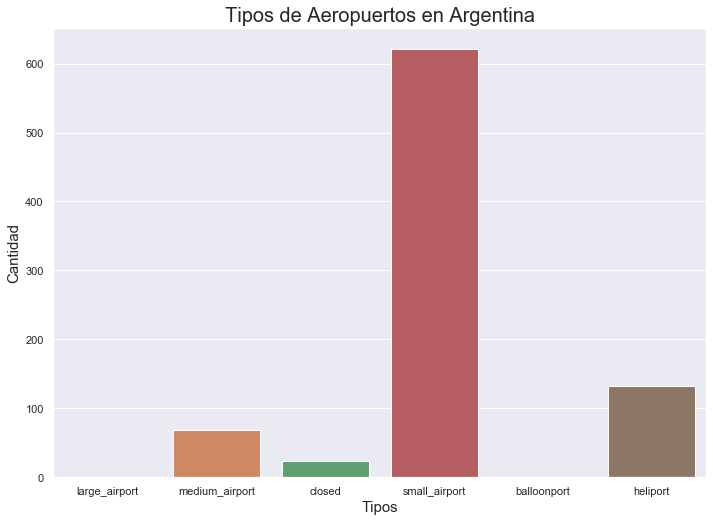

In [73]:
#Tipos de aeropuertos en Argentina

sns.countplot(airports['tipo'])
plt.title('Tipos de Aeropuertos en Argentina', fontsize = 20)
plt.xlabel('Tipos', fontsize = 15)
plt.ylabel('Cantidad', fontsize= 15)
plt.show();

In [79]:
#Agrupamos para averiguar cantidad de aeropuertos por tipo 

airports['tipo'].value_counts()

small_airport     621
heliport          132
medium_airport     69
closed             24
balloonport         1
large_airport       1
Name: tipo, dtype: int64

In [81]:
#Se agrupan y se normalizan los datos para conocer las proporciones

airports['tipo'].value_counts(normalize = True)

small_airport     0.732311
heliport          0.155660
medium_airport    0.081368
closed            0.028302
balloonport       0.001179
large_airport     0.001179
Name: tipo, dtype: float64

1. Tenemos 621 aeropuertos de pequeño tamaño lo cual representa el 73% de los aeropuertos. 
2. Tenemos 132 helipuertos en Argentina que representan el 15% de los aeropuertos. 
3. Tenemos 69 aeropuertos de mediano tamaño, que representa el 8%. 
4. Tenemos 24 aeropuertos cerrados que representan el 2% 
5. Tenemos 1 aeropuerto de gran tamaño que representa el 0.01%. 

In [84]:
#Se agrupan los aeropuertos por ciudad 

airports['Ciudad'].value_counts().head(20)

Buenos Aires           14
Santa Cruz             10
La Plata                7
Cordoba                 7
Lujan                   5
Salta                   5
Tandil                  5
San Andres de Giles     4
Trenque Lauquen         4
Corrientes              4
Don Torcuato            4
Intendente Alvear       4
General Alvear          4
Pilar                   4
Roberts                 4
La Matanza              4
Rivadavia               4
Gancedo                 4
General Pico            4
Ameghino                4
Name: Ciudad, dtype: int64

1. La ciudad de Buenos Aires tiene la mayor cantidad de aeropuertos: 14
2. Santa Cruz es la segunda ciudad con mayor cantidad de aeropuertos: 10
3. La ciudad de La Plata y Córdoba tienen 7 aeropuertos.

In [102]:
#Investigando la elevacion de los aeropuertos 

print('El valor máximo de elevacion de un aeropuerto en Argentina es de : ',airports['elevacion'].max())
print('El valor mínimo de elevacion de un aeropuerto en Argentina es de : ',airports['elevacion'].min())
print('El promedio de elevacion de los aeropuertos en Argentina es de : {0:.2f}'.format(airports['elevacion'].mean()))

El valor máximo de elevacion de un aeropuerto en Argentina es de :  13000.0
El valor mínimo de elevacion de un aeropuerto en Argentina es de :  6.0
El promedio de elevacion de los aeropuertos en Argentina es de : 845.20


In [103]:
#Conociendo el aeropuerto con mayor elevacion 

airports[airports['elevacion'] == 13000]

,id,tipo,nombre,latitud,longitud,elevacion,iso_region,Ciudad,score
489,41558,small_airport,Salar De Cauchari Airport,-24.019199,-66.797203,13000.0,AR-Y,Salar de Cauchari,50


El aeropuerto está ubicado en la provincia de Jujuy y es el más elevado del país. 

In [104]:
#Conociendo el aeropeurto con menor elevacion 

airports[airports['elevacion'] == 6]

,id,tipo,nombre,latitud,longitud,elevacion,iso_region,Ciudad,score
49,16,small_airport,Isla Martin Garcia Airport,-34.1821,-58.2469,6.0,AR-B,Isla Martin Garcia,50
54,30313,small_airport,Quilmes Airport,-34.7064,-58.2444,6.0,AR-B,Quilmes,50
654,38781,heliport,Club Nautico San Isidro Heliport,-34.4614,-58.5003,6.0,AR-B,San Isidro,25


Son tres los aeropuertos con menor elevacion en Argentina, ubicados en Isla Martín García, Quilmes y San Isidro.

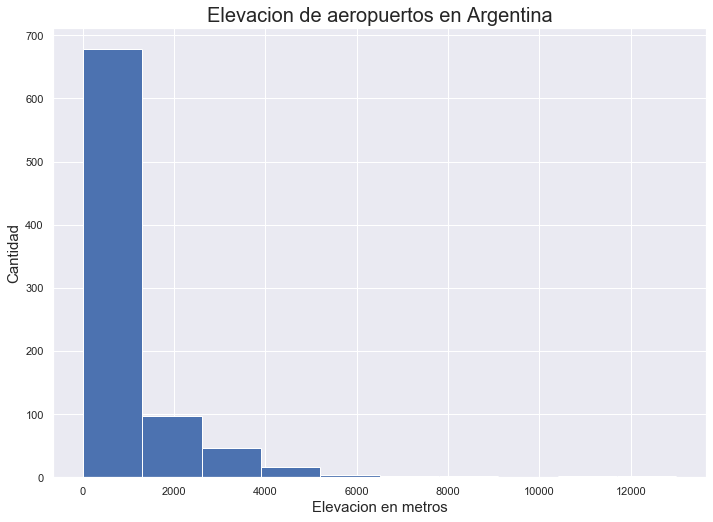

In [113]:
#Histograma para conocer las elevaciones 

plt.hist(x = 'elevacion', data = airports)
plt.xlabel('Elevacion en metros', fontsize = 15)
plt.ylabel('Cantidad', fontsize = 15)
plt.title('Elevacion de aeropuertos en Argentina', fontsize = 20)
plt.show()

1. La gran mayoria de los aeropuertos en Argentina se ubican entre los 0 y 1300 metros.

In [121]:
print('El máximo puntaje de un aeropuerto es de', airports['score'].max())
print('El peor puntaje de un aeropuerto es de', airports['score'].min())
print('Los aeropuertos de Argentina tienen un promedio de {0:.2f} puntos'.format(airports['score'].mean()))

El máximo puntaje de un aeropuerto es de 1275
El peor puntaje de un aeropuerto es de 0
Los aeropuertos de Argentina tienen un promedio de 89.80 puntos


In [122]:
#Investigando que aeropuerto es el que tiene mayor puntaje 

airports[airports['score'] == 1275]

,id,tipo,nombre,latitud,longitud,elevacion,iso_region,Ciudad,score
1,5781,large_airport,Ministro Pistarini International Airport,-34.8222,-58.5358,67.0,AR-B,Buenos Aires,1275


In [126]:
#Investigando el aeropuerto con peor puntaje 

airports[airports['score'] == 0]

,id,tipo,nombre,latitud,longitud,elevacion,iso_region,Ciudad,score
134,321748,small_airport,Daireaux Airport,-36.582800,-61.784200,380.0,AR-B,Daireaux,0
135,318268,small_airport,Fumigaciones Ortega Airport,-35.275700,-61.556400,295.0,AR-B,Martinez de Hoz,0
136,318273,small_airport,Agro Aéreo La Noria,-33.856960,-60.700380,255.0,AR-B,Pergamino,0
671,324545,small_airport,La Sistina Airstrip,-36.974031,-62.436969,0.0,AR-B,NaN,0
672,313014,small_airport,Puerto Piramides Airport,-42.550804,-64.269397,0.0,AR-U,NaN,0
673,313015,small_airport,Punta Delgada Field,-42.764154,-63.643799,0.0,AR-U,NaN,0
674,313021,small_airport,Camerones Field,-44.766670,-65.716670,0.0,AR-U,NaN,0
675,313022,small_airport,Caleta Valdés Field,-42.454874,-63.619080,0.0,AR-U,NaN,0
676,313090,small_airport,Telsen,-42.383333,-66.950000,0.0,AR-U,NaN,0
677,313091,small_airport,Gan Gan Field,-42.521363,-68.287861,0.0,AR-U,NaN,0


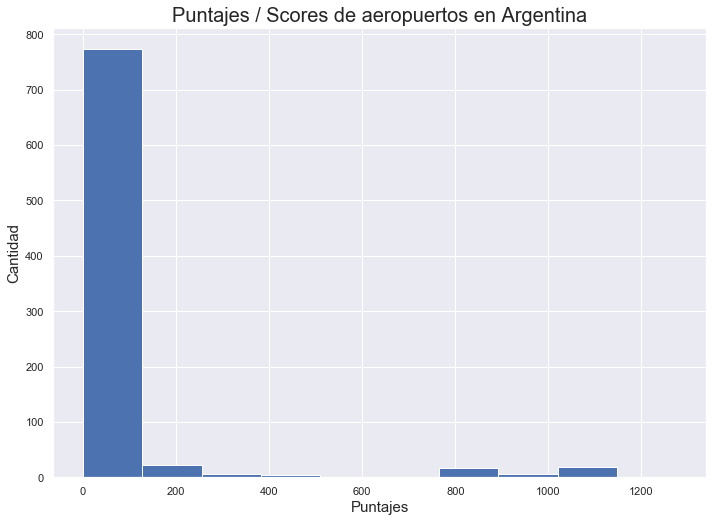

In [127]:
#Histograma para conocer las elevaciones 

plt.hist(x = 'score', data = airports)
plt.xlabel('Puntajes', fontsize = 15)
plt.ylabel('Cantidad', fontsize = 15)
plt.title('Puntajes / Scores de aeropuertos en Argentina', fontsize = 20)
plt.show()

1. Ezeiza es el aeropuerto con mayor puntaje
2. Tenemos 181 aeropuertos con los peores puntajes
3. La gran mayoria de nuestros aeropuertos tienen un puntaje que se encuentra entre 0 y 150 de score

Ubicación geográfica de aeropuertos 

In [134]:
mapas=folium.Map(location=[-35.1221802, -66.1559886],
                tiles='openstreetmap', zoom_start=4)

In [137]:
#Se visualiza mapa
display(mapas)
#Se guarda mapa
mapas.save('mapaargentina.html')

In [138]:
#Ya tenemos los mapas, ahora es turno de meter las geolocalizaciones indicadas 
#Armamos nuestras variables con latitud y longitud


latitud = list(airports['latitud'])
longitud = list(airports['longitud'])

In [139]:
for i in range(len(latitud)):
    folium.Marker([float(latitud[i]), float(longitud[i])], popup='Aeropuerto', 
                   icon=folium.Icon(color='blue')).add_to(mapas)

In [140]:
display(mapas)

In [141]:
heat_df = airports[['latitud', 'longitud']]
heat_data = [[row['latitud'],row['longitud']] for index, row in heat_df.iterrows()]

In [142]:
map_hooray = folium.Map(location=[-35.1221802, -66.1559886],
                    zoom_start =4)
HeatMap(heat_data).add_to(map_hooray)

In [143]:
map_hooray

In [144]:
map_hooray.save('airports_heat.png')
map_hooray.save('air_argentina.html')